In [1]:
!mkdir data

In [2]:
!unzip "/content/IOC.zip" -d "/content/data" 

Archive:  /content/IOC.zip
  inflating: /content/data/31-08-2000-TO-30-08-2001IOCALLN.csv  
  inflating: /content/data/31-08-2001-TO-30-08-2002IOCALLN.csv  
  inflating: /content/data/31-08-2002-TO-30-08-2003IOCALLN.csv  
  inflating: /content/data/31-08-2003-TO-30-08-2004IOCALLN.csv  
  inflating: /content/data/31-08-2004-TO-30-08-2005IOCALLN.csv  
  inflating: /content/data/31-08-2005-TO-30-08-2006IOCALLN.csv  
  inflating: /content/data/31-08-2006-TO-30-08-2007IOCALLN.csv  
  inflating: /content/data/31-08-2007-TO-30-08-2008IOCALLN.csv  
  inflating: /content/data/31-08-2008-TO-30-08-2009IOCALLN.csv  
  inflating: /content/data/31-08-2009-TO-30-08-2010IOCALLN.csv  
  inflating: /content/data/31-08-2010-TO-30-08-2011IOCALLN.csv  
  inflating: /content/data/31-08-2011-TO-30-08-2012IOCALLN.csv  
  inflating: /content/data/31-08-2012-TO-30-08-2013IOCALLN.csv  
  inflating: /content/data/31-08-2013-TO-30-08-2014IOCALLN.csv  
  inflating: /content/data/31-08-2014-TO-30-08-2015IOCALLN.csv 

In [3]:
import pandas as pd
import glob
import os

In [4]:
files = os.path.join("/content/data/", "*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
     Symbol Series         Date  Prev Close  Open Price  High Price  \
0       IOC     EQ  31-Aug-2004      404.80       408.0       412.9   
1       IOC     EQ  01-Sep-2004      406.45       409.7       413.0   
2       IOC     EQ  02-Sep-2004      409.75       412.8       415.0   
3       IOC     EQ  03-Sep-2004      406.60       402.0       407.5   
4       IOC     EQ  06-Sep-2004      403.95       405.5       407.8   
...     ...    ...          ...         ...         ...         ...   
5460    IOC     EQ  26-Aug-2013      213.25       213.8       217.7   
5461    IOC     EQ  27-Aug-2013      214.70       215.0       215.0   
5462    IOC     EQ  28-Aug-2013      208.10       198.4       214.8   
5463    IOC     EQ  29-Aug-2013      207.75       212.9       214.0   
5464    IOC     EQ  30-Aug-2013      209.70       209.7       212.8   

      Low Price  Last Price  Close Price  Average Price  \
0        404.40   

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.index = df['Date']

In [7]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
Date,,,,,,,,,,,,,
2004-08-31,IOC,EQ,2004-08-31,404.80,408.0,412.9,404.40,405.15,406.45,407.71,337312,1.375263e+08,-
2004-09-01,IOC,EQ,2004-09-01,406.45,409.7,413.0,407.15,411.05,409.75,410.03,421330,1.727580e+08,-
2004-09-02,IOC,EQ,2004-09-02,409.75,412.8,415.0,404.30,406.00,406.60,409.13,392666,1.606517e+08,-
2004-09-03,IOC,EQ,2004-09-03,406.60,402.0,407.5,400.20,404.50,403.95,403.60,312259,1.260266e+08,-
2004-09-06,IOC,EQ,2004-09-06,403.95,405.5,407.8,404.00,404.25,404.70,405.79,230977,9.372749e+07,-


In [8]:
column_lst = list(df.columns)
column_lst.remove("Average Price")

In [9]:
df_new = df.drop(column_lst, axis=1)

In [10]:
df_new.head()

,Average Price
Date,
2004-08-31,407.71
2004-09-01,410.03
2004-09-02,409.13
2004-09-03,403.60
2004-09-06,405.79


In [11]:
df_new['Date'] = df_new.index

In [12]:
df_new.head()

,Average Price,Date
Date,,
2004-08-31,407.71,2004-08-31
2004-09-01,410.03,2004-09-01
2004-09-02,409.13,2004-09-02
2004-09-03,403.60,2004-09-03
2004-09-06,405.79,2004-09-06


In [13]:
df_new = df_new.drop(["Date"], axis=1)

In [14]:
df_new.sort_values(by=['Date'])

,Average Price
Date,
2000-08-31,148.81
2000-09-04,146.47
2000-09-05,152.82
2000-09-06,156.66
2000-09-07,144.08
...,...
2022-08-04,70.94
2022-08-05,71.67
2022-08-08,73.10


In [15]:
import matplotlib.pyplot as plt

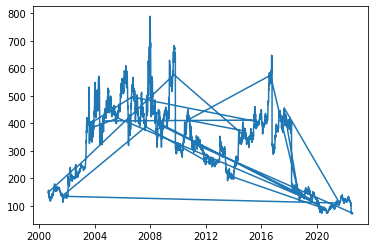

In [16]:
plt.plot(df_new)

In [17]:
## df.date.dt.month
df_new['Day'] = df_new.index.day
df_new['Month'] = df_new.index.month
df_new['Year'] = df_new.index.year
df_new['Date of week'] = df_new.index.day_of_week

In [18]:
df_new

,Average Price,Day,Month,Year,Date of week
Date,,,,,
2004-08-31,407.71,31,8,2004,1
2004-09-01,410.03,1,9,2004,2
2004-09-02,409.13,2,9,2004,3
2004-09-03,403.60,3,9,2004,4
2004-09-06,405.79,6,9,2004,0
...,...,...,...,...,...
2013-08-26,214.36,26,8,2013,0
2013-08-27,210.58,27,8,2013,1
2013-08-28,201.29,28,8,2013,2


In [19]:
df_new = df_new.sort_values(by=['Date'])

In [20]:
df_new.corr()['Average Price'].abs().sort_values(ascending=False)

Average Price    1.000000
Year             0.364426
Day              0.011979
Month            0.004897
Date of week     0.003822
Name: Average Price, dtype: float64

In [21]:
import numpy as np

In [22]:
def preprocess_numeric_column_data(data):
  columns = data.columns
  for i in columns:
    if data.dtypes[i] == np.object:
      print("Cannot process object data")
      return

  ## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise
  scale_list = []
  normalise_list = []
  data_skew = data.skew()

  for i in columns:
    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:
      scale_list.append(i)
    else:
      normalise_list.append(i)
  return (scale_list, normalise_list)

In [23]:
scale_list, normalize_list = preprocess_numeric_column_data(df_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [24]:
scale_list

['Average Price', 'Day', 'Month', 'Year', 'Date of week']

In [25]:
from sklearn import preprocessing

In [26]:
scale_list.remove('Average Price')

In [27]:
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(df_new[scale_list])
df_new[scale_list] = standard_scaler.transform(df_new[scale_list])

In [28]:
y_scaler = preprocessing.StandardScaler()
y_scaler.fit(df_new['Average Price'].values.reshape(-1, 1))
df_new['Average Price'] = y_scaler.transform(df_new['Average Price'].values.reshape(-1, 1))

In [29]:
df_new.head()

,Average Price,Day,Month,Year,Date of week
Date,,,,,
2000-08-31,-1.132455,1.731849,0.432277,-1.748664,0.698042
2000-09-04,-1.148791,-1.340615,0.722605,-1.748664,-1.408031
2000-09-05,-1.104462,-1.226820,0.722605,-1.748664,-0.706007
2000-09-06,-1.077656,-1.113025,0.722605,-1.748664,-0.003982
2000-09-07,-1.165475,-0.999230,0.722605,-1.748664,0.698042


In [30]:
X_train = df_new[:-365].drop(columns = ['Average Price']).values
y_train = df_new[:-365].drop(columns = ['Day','Month','Year','Date of week']).values
X_test = df_new[-365:-40].drop(columns = ['Average Price']).values
y_test = df_new[-365:-40].drop(columns = ['Day','Month','Year','Date of week']).values

## XGBOOST

In [31]:
from xgboost import XGBRegressor

In [32]:
model_xgb = XGBRegressor(learning_rate = 0.01, n_estimators = 1000, max_depth = 10)
model_xgb.fit(X_train, y_train)

[16:59:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=10, n_estimators=1000)

In [33]:
y_hat = model_xgb.predict(X_test)

In [34]:
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))

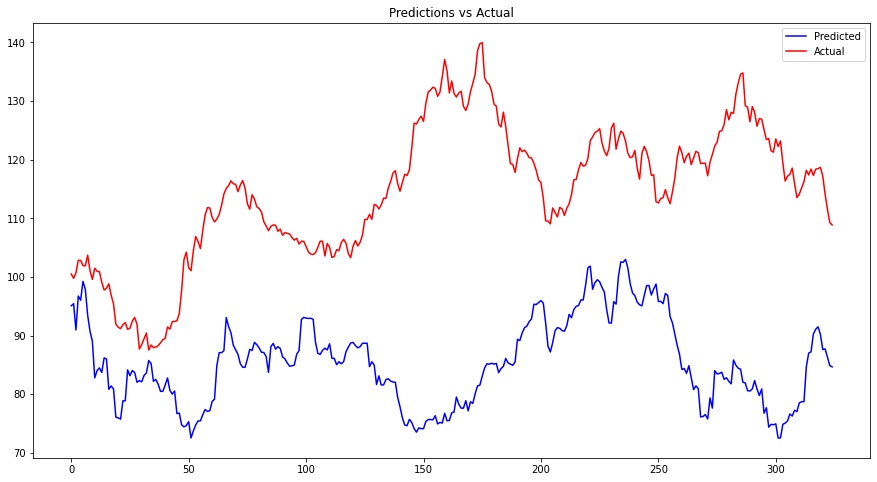

In [35]:
plt.figure(figsize=(15, 8))
plt.plot(y_hat, label='Predicted', color="blue")
plt.plot(y_test, label='Actual', color="red")
plt.title("Predictions vs Actual")
plt.legend()

In [36]:
mdape = np.median(np.abs(y_hat - y_test)/np.abs(y_test))
acc = (1-mdape)*100
print("Median Absolute Percentage Error: ",mdape)
print("Accuracy: ", acc)

Median Absolute Percentage Error:  0.22613796578931336
Accuracy:  77.38620342106867


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=0)

In [39]:
y_hat = regressor.predict(X_test)

In [40]:
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))

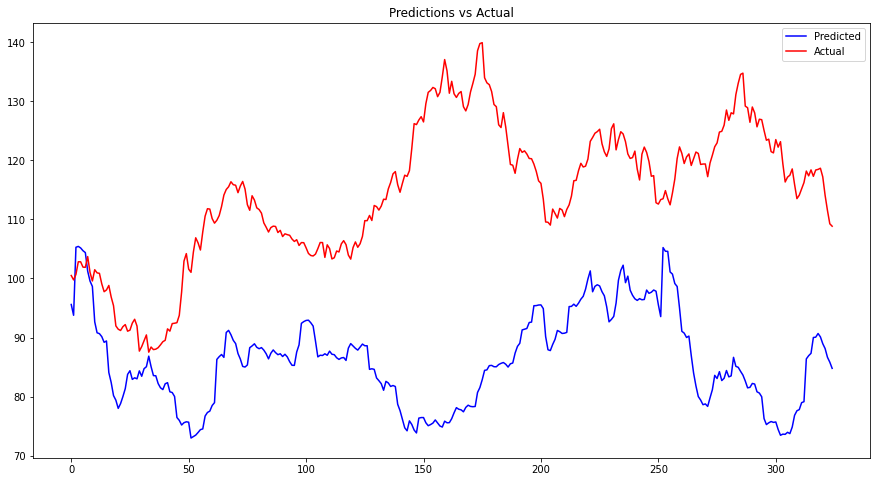

In [41]:
plt.figure(figsize=(15, 8))
plt.plot(y_hat, label='Predicted', color="blue")
plt.plot(y_test, label='Actual', color="red")
plt.title("Predictions vs Actual")
plt.legend()

In [42]:
mdape = np.median(np.abs(y_hat - y_test)/np.abs(y_test))
acc = (1-mdape)*100
print("Median Absolute Percentage Error: ",mdape)
print("Accuracy: ", acc)

Median Absolute Percentage Error:  0.22259494758549647
Accuracy:  77.74050524145035


## Decision Tree


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [53]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
y_hat = regressor.predict(X_test)

In [55]:
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))

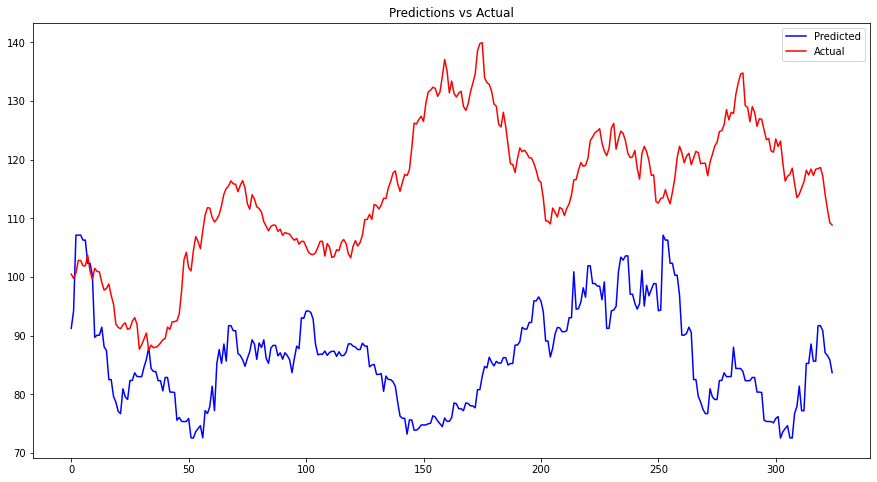

In [56]:
plt.figure(figsize=(15, 8))
plt.plot(y_hat, label='Predicted', color="blue")
plt.plot(y_test, label='Actual', color="red")
plt.title("Predictions vs Actual")
plt.legend()

In [57]:
mdape = np.median(np.abs(y_hat - y_test)/np.abs(y_test))
acc = (1-mdape)*100
print("Median Absolute Percentage Error: ",mdape)
print("Accuracy: ", acc)

Median Absolute Percentage Error:  0.2530098669321992
Accuracy:  74.69901330678009


## Extra Trees Regressor


In [58]:
regressor = ExtraTreesRegressor()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor()

In [59]:
y_hat = regressor.predict(X_test)

In [60]:
y_hat = y_scaler.inverse_transform(y_hat.reshape(-1, 1))

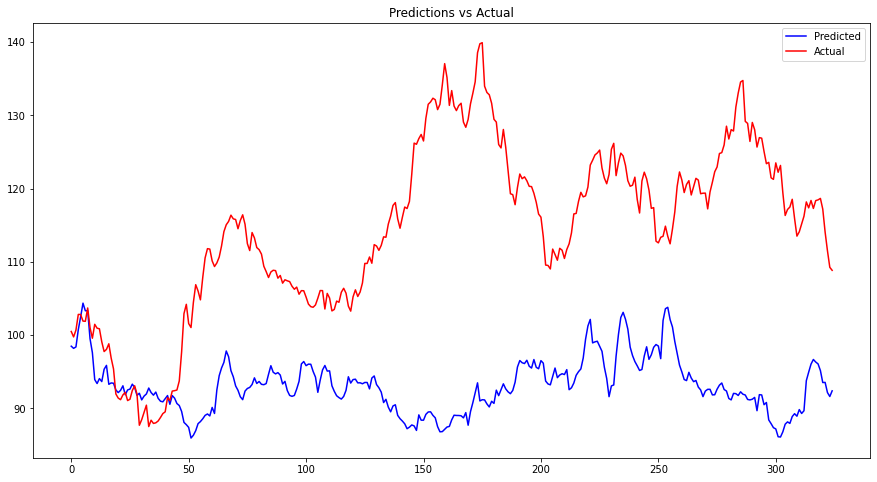

In [62]:
plt.figure(figsize=(15, 8))
plt.plot(y_hat, label='Predicted', color="blue")
plt.plot(y_test, label='Actual', color="red")
plt.title("Predictions vs Actual")
plt.legend()

In [61]:
mdape = np.median(np.abs(y_hat - y_test)/np.abs(y_test))
acc = (1-mdape)*100
print("Median Absolute Percentage Error: ",mdape)
print("Accuracy: ", acc)

Median Absolute Percentage Error:  0.19221274763135082
Accuracy:  80.77872523686491


## Extras

In [43]:
y_hat = y_hat.reshape(len(y_hat))

In [44]:
y_test = y_test.reshape(len(y_test))

In [45]:
df_rf = pd.DataFrame()

In [46]:
df_rf['True'] = y_test

In [47]:
df_rf['predicted'] = y_hat

In [48]:
df_rf

,True,predicted
0,100.50,95.5942
1,99.76,93.7656
2,100.69,105.2850
3,102.83,105.4307
4,102.82,105.1706
...,...,...
320,117.21,88.9571
321,114.08,88.1311
322,111.52,86.6569
323,109.26,85.8271


In [49]:
df_rf['diff'] = abs(df_rf['predicted']-df_rf['True'])

In [50]:
df_rf

,True,predicted,diff
0,100.50,95.5942,4.9058
1,99.76,93.7656,5.9944
2,100.69,105.2850,4.5950
3,102.83,105.4307,2.6007
4,102.82,105.1706,2.3506
...,...,...,...
320,117.21,88.9571,28.2529
321,114.08,88.1311,25.9489
322,111.52,86.6569,24.8631
323,109.26,85.8271,23.4329


In [51]:
max(df_rf['diff'])

61.235199999999935